# Import libraries

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c 'nlp-getting-started'

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                       179MB  2020-05-21 18:57:53          16033  
rohanrao/chai-time-data-science                             Chai Time Data Science | CTDS.Show                 3MB  2020-06-20 23:01:09            394  
andrewmvd/data-analyst-jobs                                 Data Analyst Jobs                                  2MB  2020-07-14 08:37:57             71  
mrgeislinger/bart-ridership                                 BART Ridership                                   325MB  2020-07-09 22:28:07  

In [ ]:
!pip install SpellChecker
!pip install nlppreprocess
!pip install autocorrect
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import Counter
from pathlib import Path
import os
import numpy as np
import pandas as pd
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')



import re
from nltk.stem.isri import ISRIStemmer
from textblob import Word, TextBlob
from autocorrect import spell
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nlppreprocess import NLP
# from spellchecker import SpellChecker

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Read data that we get from Kaggle APIs
def reda_file(file_path):
  return pd.read_csv(file_path)

In [ ]:
df_train = reda_file('train.csv')
df_test = reda_file('test.csv')
print(len(df_train))
print(len(df_test))
print(df_test.head())
df_train.head()

7613
3263
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]

# Build Vocab

First let us build the vocabulary from training and testing data

The model will work for this notebook as mentioned of the name of the notebook without any pre-processing event of change the case of words.

In [ ]:
df_text = list(df_train['text'])
print(df_text[:3])

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all', 'Forest fire near La Ronge Sask. Canada', "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"]


In [ ]:
def build_vocab(text_list):
  '''
  Argument:
    List of strings
  Return:
    list of tokenizer strings and all of uniqe vocab
  '''
  # using nltk word_tokenize and convert each sentence(tweet) to list of words
  df_text_tokenized = [word_tokenize(text) for text in text_list]
  print(df_text_tokenized, "\n", "#"*50)
  # Expand all of words in all of sentence(tweets) in one list
  word_vocab = list([item for sublist in df_text_tokenized for item in sublist])
  print(word_vocab, "\n", "#"*50)
  print("Before Get uniqe vocab",len(word_vocab), "\n", "#"*50)
  word_vocab = list((set(word_vocab))) # if we sort these unique words model will be less accurate
  print(word_vocab, "\n", "#"*50)
  print("Atfer Get uniqe vocab",len(word_vocab), "\n", "#"*50)
  return df_text_tokenized, word_vocab
df_text_tokenized, word_vocab = build_vocab(df_text)

[['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all'], ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', '.', 'Canada'], ['All', 'residents', 'asked', 'to', "'shelter", 'in', 'place', "'", 'are', 'being', 'notified', 'by', 'officers', '.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected'], ['13,000', 'people', 'receive', '#', 'wildfires', 'evacuation', 'orders', 'in', 'California'], ['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#', 'Alaska', 'as', 'smoke', 'from', '#', 'wildfires', 'pours', 'into', 'a', 'school'], ['#', 'RockyFire', 'Update', '=', '>', 'California', 'Hwy', '.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#', 'CAfire', '#', 'wildfires'], ['#', 'flood', '#', 'disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou', ',', 'Colorado', 'Springs', 'areas'], ['I', "'m", 'on', 'top', 'of

In [ ]:
# map words to indexes to present each word in our vocab to uniqe index
dict_word_vocab = dict([(key, val) for (val , key) in enumerate(word_vocab)])
print(dict_word_vocab)

{'bangtan': 0, 'difficultpeople': 1, 'Twi': 2, 'walking': 3, 'continues': 4, 'VOL': 5, '//t.co/OYY9MGW7HN': 6, 'operation': 7, 'yours': 8, 'marketing': 9, 'Aurora': 10, 'BALL': 11, 'govern': 12, '//t.co/YsFYEahpVg': 13, '//t.co/itnKBxgWLH': 14, 'idk': 15, 'Customer': 16, 'distributed': 17, 'XGN_Infinity': 18, 'Serious': 19, 'index': 20, 'emhub': 21, 'ika': 22, 'RIOTING': 23, 'meshnewsdesk': 24, 'Correlate': 25, 'virtual': 26, 'surface': 27, 'Mechanical': 28, 'Natsu': 29, 'Got': 30, '//t.co/cFouwPBRCG': 31, 'trained': 32, 'UntamedDirewolf': 33, 'sailors': 34, 'town': 35, 'beep': 36, '//t.co/hPplD1jHtZ': 37, 'enormous': 38, 'eh': 39, 'Lucio': 40, 'blind': 41, 'geoTech': 42, 'mthe': 43, 'Darwinism': 44, 'KS100': 45, 'capeann': 46, 'computers': 47, 'films': 48, 'baseman': 49, 'Marketforce': 50, '//t.co/1puLaekxcq': 51, 'ler': 52, 'sizYgwWF': 53, '//t.co/37DqvJHNCv': 54, 'covered': 55, 'absolutely': 56, 'remembering': 57, 'parents': 58, 'pleasure': 59, '//t.co/pmxEzUo4AY': 60, 'russian': 61

In [ ]:
print(df_text_tokenized)

[['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all'], ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', '.', 'Canada'], ['All', 'residents', 'asked', 'to', "'shelter", 'in', 'place', "'", 'are', 'being', 'notified', 'by', 'officers', '.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected'], ['13,000', 'people', 'receive', '#', 'wildfires', 'evacuation', 'orders', 'in', 'California'], ['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#', 'Alaska', 'as', 'smoke', 'from', '#', 'wildfires', 'pours', 'into', 'a', 'school'], ['#', 'RockyFire', 'Update', '=', '>', 'California', 'Hwy', '.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#', 'CAfire', '#', 'wildfires'], ['#', 'flood', '#', 'disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou', ',', 'Colorado', 'Springs', 'areas'], ['I', "'m", 'on', 'top', 'of

In [ ]:
def bulid_binary_BOW(text_list, dict_word_vocab):
  '''
  Argument:
    text_list: list of all text each of them as one string of vocabs 
    dict_word_vocab: dictionary that map your unique words to indexes
  reutrn:
    list of lists each of contain index of each word
  '''
  # for each word in the sentence get its index
  text_list_indexes = [[dict_word_vocab[word] for word in text]  for text in text_list]

  # code in simple way
  # for text in text_list:
  #   indexes = []
  #   for word in text:
  #     indexes.append(dict_word_vocab[word])
  #   text_list_indexes.append(indexes)
  return text_list_indexes
text_list_indexes = bulid_binary_BOW(df_text_tokenized, dict_word_vocab)
print(len(text_list_indexes))
text_list_indexes[1]

7613


[23026, 5326, 23456, 5974, 11710, 27175, 15360, 4287]

In [ ]:
print(df_text_tokenized[0])

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']


In [ ]:
# ensuring that some words take its actual index
print(dict_word_vocab['Our'], "==", text_list_indexes[0][0])
print(dict_word_vocab['Deeds'], "==", text_list_indexes[0][1])
print(dict_word_vocab['us'], "==", text_list_indexes[0][12])
print(dict_word_vocab['all'], "==", text_list_indexes[0][13])

9122 == 9122
8105 == 8105
25840 == 25840
9899 == 9899


In [ ]:
def vectorize_sequences(seqences, dict_word_vocab):
  '''
  Argument:
    seqence: of lists each of them is list of indexes that reflect the index of the word in our dict vocab
    dimension: Our uniqe vocab size
  return:
    BOW_features: 2-d numby array that map words to (0, 1) as binary BOW model.
  '''
  BOW_features = np.zeros((len(seqences), len(dict_word_vocab)))
  for i, seqence in enumerate(seqences):
    BOW_features[i, seqence] = 1
  return BOW_features
BOW_features = vectorize_sequences(text_list_indexes, dict_word_vocab)

In [ ]:
print("The BOW Binary Model shape is: ", BOW_features.shape)
BOW_features[:5]

The BOW Binary Model shape is:  (7613, 27291)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Neural Network
Now its time to move on Neural network after what we have get our Binary BOW ready for feeding to the NN.



In [ ]:
def BOW_model(x_train, x_val, y_train, y_val, input_shape):
  # Sequential model

  model = models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(input_shape,))) # first hidden layer
  model.add(layers.Dense(16, activation='relu')) # Second hidden layers
  model.add(layers.Dense(1, activation='sigmoid')) # output layer
  model.compile(
      optimizer='rmsprop',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  history = model.fit(x_train, 
            y_train,
            epochs=20,
            batch_size=1024,
            validation_data=(x_val, y_val))
  return history

# Split

We need to split the data into train and validation parts.


In [ ]:
X = BOW_features
y = np.array(list(df_train['target']))
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

6090
1523
6090
1523


In [ ]:
# run the model
history = BOW_model(x_train, x_val, y_train, y_val, len(dict_word_vocab) )

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 3s 424us/step - loss: 0.6774 - accuracy: 0.6583 - val_loss: 0.6553 - val_accuracy: 0.7472
Epoch 2/20
6090/6090 [==============================] - 1s 139us/step - loss: 0.6211 - accuracy: 0.8072 - val_loss: 0.6212 - val_accuracy: 0.7794
Epoch 3/20
6090/6090 [==============================] - 1s 134us/step - loss: 0.5662 - accuracy: 0.8470 - val_loss: 0.5943 - val_accuracy: 0.7833
Epoch 4/20
6090/6090 [==============================] - 1s 136us/step - loss: 0.5162 - accuracy: 0.8744 - val_loss: 0.5715 - val_accuracy: 0.7853
Epoch 5/20
6090/6090 [==============================] - 1s 136us/step - loss: 0.4695 - accuracy: 0.8920 - val_loss: 0.5518 - val_accuracy: 0.7873
Epoch 6/20
6090/6090 [==============================] - 1s 136us/step - loss: 0.4259 - accuracy: 0.9067 - val_loss: 0.5349 - val_accuracy: 0.7886
Epoch 7/20
6090/6090 [==============================] - 1s 135us/step - loss

In [ ]:
# We have 4 values as Evaluation 2 for training and 2 for testing
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

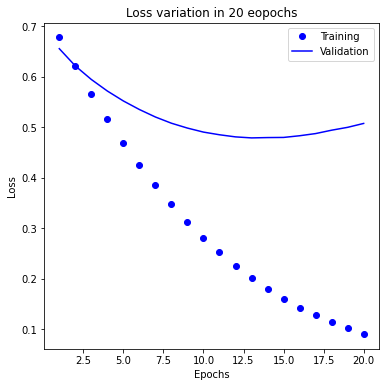

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

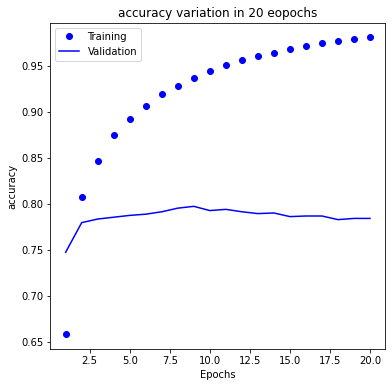

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

# Using Countvectorizer

In [ ]:
def count_vectorize(df):
    '''
    Argumen:
        df dataframe of multiple text
    return:
        CountVectorizer Model that work as BOW but instead it give count number of the word presented in its document
    '''
# I fit the vector to all of the data
    vectorizer = CountVectorizer()
    vectorize = vectorizer.fit(df) 
    return vectorizer

In [ ]:
X = list(df_train['text'])
y = np.array(list(df_train['target']))
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

6090
1523
6090
1523


In [ ]:
count_vect = count_vectorize(X)
cv_x_train, cv_x_val = count_vect.transform(x_train), count_vect.transform(x_val)
cv_x_train, cv_x_val = cv_x_train.toarray(), cv_x_val.toarray()


In [ ]:
print(cv_x_train.shape) # now we can see unique words as second shape is different about what we have in BOW

(6090, 21637)


In [ ]:
print(x_train[15])
sums = sum((cv_x_train[15] > 0 ) + 0)
print(sums)
sums = ((cv_x_train[15] > 0 ) + 0)
for i in sums:
  if i > 0:
    print(i)
# is it because maybe sklearn make a random split so its different or because its clean text from stop words

@BlossomingLilac so destruction it seems. I see myself ruined... somehow.
9
1
1
1
1
1
1
1
1
1


In [ ]:
# run the model count vectorizer
history = BOW_model(cv_x_train, cv_x_val, y_train, y_val, 21637)

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 134us/step - loss: 0.6759 - accuracy: 0.6225 - val_loss: 0.6495 - val_accuracy: 0.7334
Epoch 2/20
6090/6090 [==============================] - 1s 115us/step - loss: 0.6227 - accuracy: 0.7593 - val_loss: 0.6188 - val_accuracy: 0.7472
Epoch 3/20
6090/6090 [==============================] - 1s 112us/step - loss: 0.5774 - accuracy: 0.8067 - val_loss: 0.5950 - val_accuracy: 0.7702
Epoch 4/20
6090/6090 [==============================] - 1s 113us/step - loss: 0.5379 - accuracy: 0.8379 - val_loss: 0.5750 - val_accuracy: 0.7807
Epoch 5/20
6090/6090 [==============================] - 1s 115us/step - loss: 0.5007 - accuracy: 0.8606 - val_loss: 0.5576 - val_accuracy: 0.7886
Epoch 6/20
6090/6090 [==============================] - 1s 114us/step - loss: 0.4654 - accuracy: 0.8810 - val_loss: 0.5420 - val_accuracy: 0.7965
Epoch 7/20
6090/6090 [==============================] - 1s 113us/step - loss

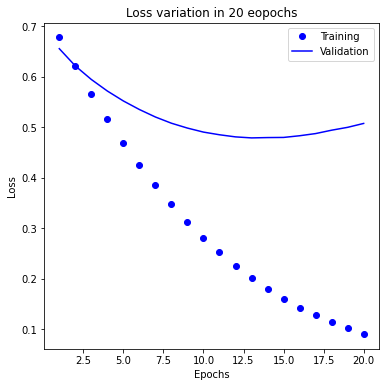

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

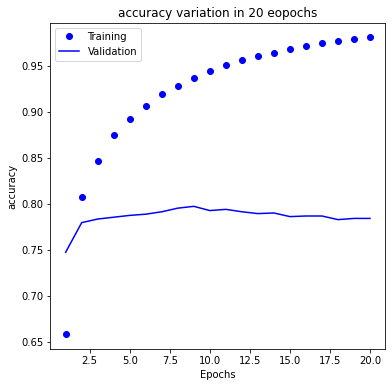

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

# TF-IDF Features Extraction

In [ ]:
def tfidf_vectorizer(df):
    '''
    Argumen:
        df dataframe of multiple reviews
    return:
        Train & test arrays that can feed to the model
    '''
# I fit the vector to all of the data
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer = tfidf_vectorizer.fit(df) 
    word_idf_weights = tfidf_vectorizer.idf_
    print("Our 10 words weights\n\n",word_idf_weights[:10])
    return tfidf_vectorizer

In [ ]:
X = list(df_train['text'])
y = np.array(list(df_train['target']))
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

6090
1523
6090
1523


In [ ]:
tfidf_vectorizer = tfidf_vectorizer(X)
tfidf_x_train, tfidf_x_val = tfidf_vectorizer.transform(x_train), tfidf_vectorizer.transform(x_val)
tfidf_x_train, tfidf_x_val = tfidf_x_train.toarray(), tfidf_x_val.toarray()
print(tfidf_x_train[0, :30]) # it normalize the values to be between 0 and 1
print(tfidf_x_train.shape)

Our 10 words weights

 [6.57044811 8.32830602 9.24459676 9.24459676 9.24459676 9.24459676
 9.24459676 7.10453059 7.8583024  9.24459676]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
(6090, 21637)


In [ ]:
print(x_train[3])
sums = sum((tfidf_x_train[3] > 0 ) + 0)
print(sums)
sums = ((tfidf_x_train[3] > 0 ) + 0)
for i in tfidf_x_train[3]:
  if i > 0:
    print(i)

Photographer Brian Ruebs endures 4500-feet climb to capture bride and groom http://t.co/BmWmpOyDIg
15
0.3080471769208824
0.09683013431295767
0.3221777936898979
0.29802134476950576
0.28389072800049037
0.2902447051893201
0.29802134476950576
0.05745807477816432
0.3080471769208824
0.2597342790800982
0.29802134476950576
0.06091653955011598
0.29802134476950576
0.3080471769208824
0.0870013318866631


In [ ]:
# run the model TF-IDF vectorizer
history = BOW_model(tfidf_x_train, tfidf_x_val, y_train, y_val, 21637)

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 138us/step - loss: 0.6877 - accuracy: 0.6675 - val_loss: 0.6781 - val_accuracy: 0.7728
Epoch 2/20
6090/6090 [==============================] - 1s 114us/step - loss: 0.6639 - accuracy: 0.8617 - val_loss: 0.6615 - val_accuracy: 0.7978
Epoch 3/20
6090/6090 [==============================] - 1s 113us/step - loss: 0.6369 - accuracy: 0.8962 - val_loss: 0.6455 - val_accuracy: 0.7965
Epoch 4/20
6090/6090 [==============================] - 1s 111us/step - loss: 0.6093 - accuracy: 0.9095 - val_loss: 0.6297 - val_accuracy: 0.7965
Epoch 5/20
6090/6090 [==============================] - 1s 110us/step - loss: 0.5812 - accuracy: 0.9179 - val_loss: 0.6140 - val_accuracy: 0.7951
Epoch 6/20
6090/6090 [==============================] - 1s 111us/step - loss: 0.5524 - accuracy: 0.9232 - val_loss: 0.5994 - val_accuracy: 0.7892
Epoch 7/20
6090/6090 [==============================] - 1s 111us/step - loss

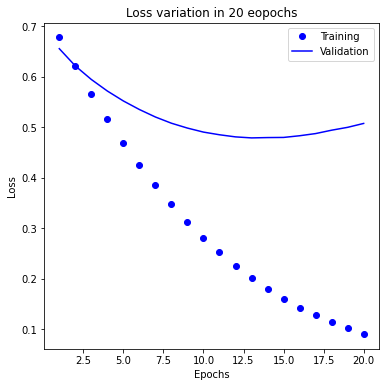

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

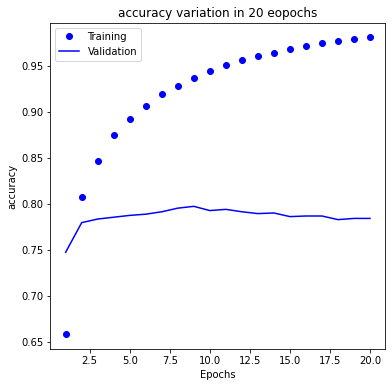

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

# Same above process but using Keras

In [ ]:
# with all vocab we can see difference in time and accuracy
tok = Tokenizer(oov_token='UNK')
df_train = reda_file('train.csv')
text = df_train['text']
print(text[:3])
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
tok.fit_on_texts(text)
binary_bow = tok.texts_to_matrix(text, mode='binary')
print(binary_bow.shape)
print(binary_bow[0])
x_train, x_val, y_train, y_val = train_test_split(binary_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run the model binary BOW using keras
history = BOW_model(x_train, x_val, y_train, y_val, binary_bow.shape[1])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object
[1. 1. 1.]
(7613, 22702)
[0. 0. 0. ... 0. 0. 0.]
(6090, 22702) (6090,)
(1523, 22702) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 136us/step - loss: 0.6819 - accuracy: 0.6805 - val_loss: 0.6628 - val_accuracy: 0.7649
Epoch 2/20
6090/6090 [==============================] - 1s 115us/step - loss: 0.6350 - accuracy: 0.8379 - val_loss: 0.6298 - val_accuracy: 0.7892
Epoch 3/20
6090/6090 [==============================] - 1s 114us/step - loss: 0.5848 - accuracy: 0.8732 - val_loss: 0.6009 - val_accuracy: 0.7951
Epoch 4/20
6090/6090 [==============================] - 1s 113us/step - loss: 0.5371 - accuracy: 0.8875 - val_loss: 0.5750 - val_accuracy: 0.8017
Epoch 5/20
6090/6090 [==============================] - 1s 113us/step - loss: 0.4916

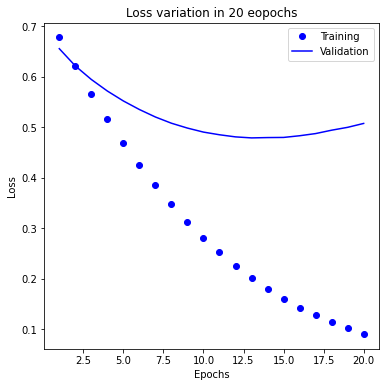

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

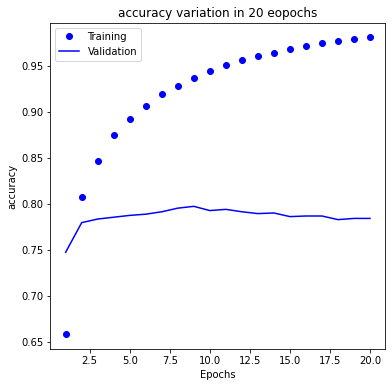

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 10000 vocab 
vocab_size = 10000
tok = Tokenizer(num_words=vocab_size, oov_token='UNK')
df_train = reda_file('train.csv')
text = df_train['text']
print(text[:3])
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
tok.fit_on_texts(text)
binary_bow = tok.texts_to_matrix(text, mode='binary')
print(binary_bow.shape)
print(binary_bow[0])
x_train, x_val, y_train, y_val = train_test_split(binary_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run the model binary BOW using keras
history = BOW_model(x_train, x_val, y_train, y_val, binary_bow.shape[1])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object
[1. 1. 1.]
(7613, 10000)
[0. 0. 0. ... 0. 0. 0.]
(6090, 10000) (6090,)
(1523, 10000) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 0s 72us/step - loss: 0.6717 - accuracy: 0.6567 - val_loss: 0.6402 - val_accuracy: 0.7479
Epoch 2/20
6090/6090 [==============================] - 0s 54us/step - loss: 0.6106 - accuracy: 0.7811 - val_loss: 0.5969 - val_accuracy: 0.7846
Epoch 3/20
6090/6090 [==============================] - 0s 54us/step - loss: 0.5548 - accuracy: 0.8271 - val_loss: 0.5621 - val_accuracy: 0.7971
Epoch 4/20
6090/6090 [==============================] - 0s 54us/step - loss: 0.5054 - accuracy: 0.8512 - val_loss: 0.5341 - val_accuracy: 0.8083
Epoch 5/20
6090/6090 [==============================] - 0s 54us/step - loss: 0.4616 - ac

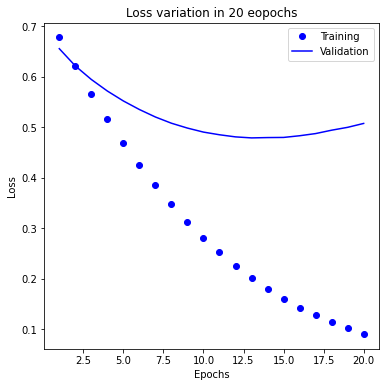

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

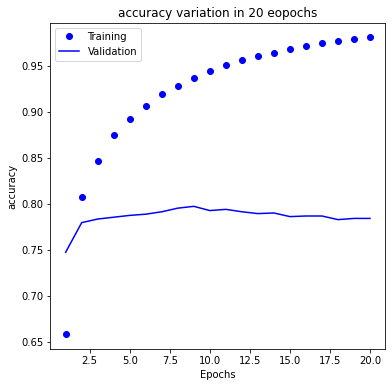

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 100 vocab 
vocab_size = 100
tok = Tokenizer(num_words=vocab_size, oov_token='UNK')
df_train = reda_file('train.csv')
text = df_train['text']
print(text[:3])
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
tok.fit_on_texts(text)
binary_bow = tok.texts_to_matrix(text, mode='binary')
print(binary_bow.shape)
print(binary_bow[0])
x_train, x_val, y_train, y_val = train_test_split(binary_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run the model binary BOW using keras
history = BOW_model(x_train, x_val, y_train, y_val, binary_bow.shape[1])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object
[1. 1. 1.]
(7613, 100)
[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
(6090, 100) (6090,)
(1523, 100) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 0s 25us/step - loss: 0.6840 - accuracy: 0.5596 - val_loss: 0.6770 - val_accuracy: 0.5594
Epoch 2/20
6090/6090 [==============================] - 0s 6us/step - loss: 0.6717 - accuracy: 0.5744 - val_loss: 0.6690 - val_accuracy: 0.5706
Epoch 3/20
6090/6090 [==============================] - 0s 7us/step - loss: 0.6630 - accuracy: 0.5910 -

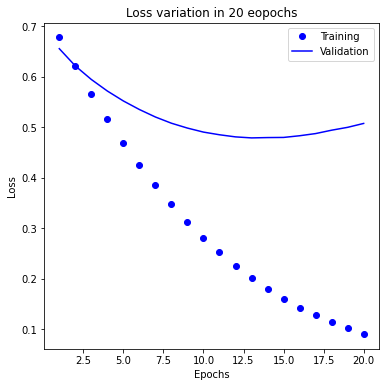

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

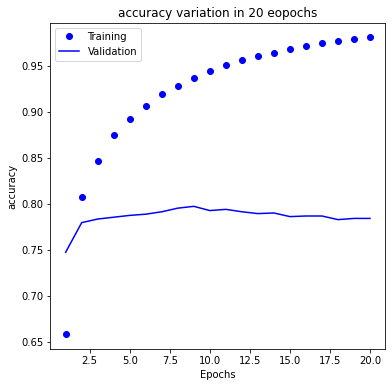

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with all vocab 

tok = Tokenizer( oov_token='UNK')
df_train = reda_file('train.csv')
text = df_train['text']
print(text[:3])
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
tok.fit_on_texts(text)
count_bow = tok.texts_to_matrix(text, mode='count')
print(count_bow.shape)
print(count_bow[0])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run the model binary count vectorize using keras
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object
[1. 1. 1.]
(7613, 22702)
[0. 0. 0. ... 0. 0. 0.]
(6090, 22702) (6090,)
(1523, 22702) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 132us/step - loss: 0.6757 - accuracy: 0.6829 - val_loss: 0.6454 - val_accuracy: 0.7840
Epoch 2/20
6090/6090 [==============================] - 1s 115us/step - loss: 0.6100 - accuracy: 0.8320 - val_loss: 0.6009 - val_accuracy: 0.7984
Epoch 3/20
6090/6090 [==============================] - 1s 113us/step - loss: 0.5467 - accuracy: 0.8754 - val_loss: 0.5681 - val_accuracy: 0.8030
Epoch 4/20
6090/6090 [==============================] - 1s 114us/step - loss: 0.4929 - accuracy: 0.8995 - val_loss: 0.5412 - val_accuracy: 0.8096
Epoch 5/20
6090/6090 [==============================] - 1s 114us/step - loss: 0.4457

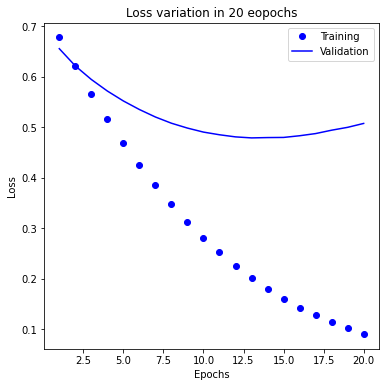

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

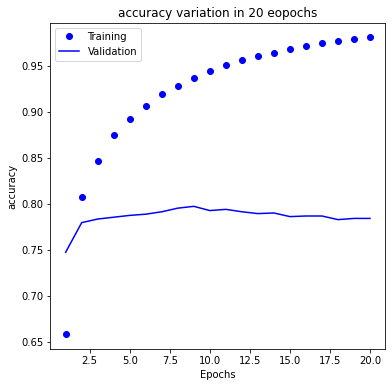

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 10000 vocab 
vocab_size = 10000
tok = Tokenizer(num_words=vocab_size, oov_token='UNK')
df_train = reda_file('train.csv')
text = df_train['text']
print(text[:3])
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
tok.fit_on_texts(text)
count_bow = tok.texts_to_matrix(text, mode='count')
print(count_bow.shape)
print(count_bow[0])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run the model binary count vectorize using keras
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object
[1. 1. 1.]
(7613, 10000)
[0. 0. 0. ... 0. 0. 0.]
(6090, 10000) (6090,)
(1523, 10000) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 0s 74us/step - loss: 0.6806 - accuracy: 0.6535 - val_loss: 0.6606 - val_accuracy: 0.7492
Epoch 2/20
6090/6090 [==============================] - 0s 55us/step - loss: 0.6369 - accuracy: 0.8010 - val_loss: 0.6251 - val_accuracy: 0.7873
Epoch 3/20
6090/6090 [==============================] - 0s 55us/step - loss: 0.5945 - accuracy: 0.8427 - val_loss: 0.5967 - val_accuracy: 0.7991
Epoch 4/20
6090/6090 [==============================] - 0s 56us/step - loss: 0.5574 - accuracy: 0.8586 - val_loss: 0.5724 - val_accuracy: 0.8011
Epoch 5/20
6090/6090 [==============================] - 0s 56us/step - loss: 0.5233 - ac

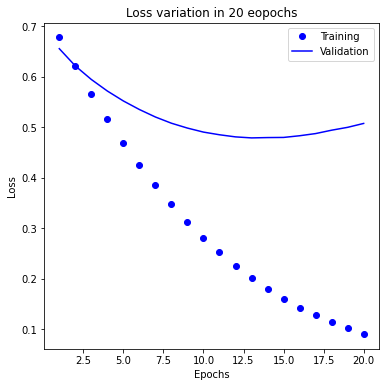

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

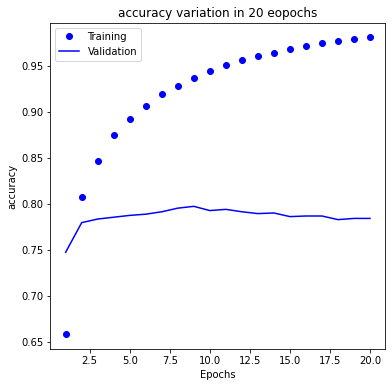

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 100 vocab 
vocab_size = 100
tok = Tokenizer(num_words=vocab_size, oov_token='UNK')
df_train = reda_file('train.csv')
text = df_train['text']
print(text[:3])
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
tok.fit_on_texts(text)
count_bow = tok.texts_to_matrix(text, mode='count')
print(count_bow.shape)
print(count_bow[0])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run the model binary count vectorize using keras
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object
[1. 1. 1.]
(7613, 100)
[0. 7. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
(6090, 100) (6090,)
(1523, 100) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 0s 23us/step - loss: 0.6873 - accuracy: 0.5596 - val_loss: 0.6793 - val_accuracy: 0.5896
Epoch 2/20
6090/6090 [==============================] - 0s 6us/step - loss: 0.6747 - accuracy: 0.5824 - val_loss: 0.6722 - val_accuracy: 0.6192
Epoch 3/20
6090/6090 [==============================] - 0s 6us/step - loss: 0.6662 - accuracy: 0.6273 -

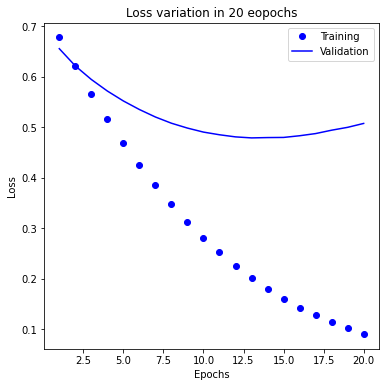

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

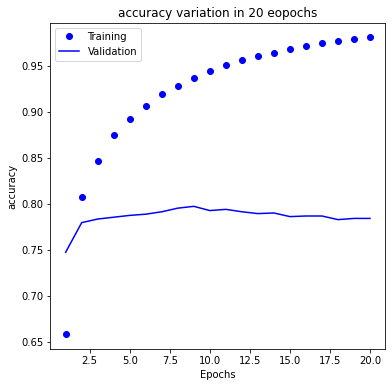

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()